In [1]:
import pandas as pd

In [2]:
url = "Credit_Risk_Prediction.csv"
data = pd.read_csv(url)
data

,Age,Loan,MonthlyPaid,Gender,Credit Risk Prediction
0,25,586000,2250,m,Yes
1,63,869000,4950,f,No
2,49,665000,4500,m,Yes
3,66,245000,4700,m,No
4,21,282000,1000,f,Yes
...,...,...,...,...,...
294,62,662000,600,f,No
295,40,195000,3850,f,Yes
296,22,215000,1000,f,Yes
297,59,349000,2150,m,No


In [3]:
#Convert the unit of Loan and MonthlyPaid to (k)
data["Loan"] = data["Loan"] / 1000
data["MonthlyPaid"] = data["MonthlyPaid"] / 1000

In [4]:
data["Gender"] = data["Gender"].map({"m":1 , "f":0})
data["Credit Risk Prediction"] = data["Credit Risk Prediction"].map({"Yes":1 , "No":0})

In [5]:
from sklearn.model_selection import train_test_split

x = data[["Age","Loan","MonthlyPaid","Gender"]]
y = data["Credit Risk Prediction"]

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=87)
x_train = x_train.to_numpy()
x_test = x_test.to_numpy()

## Feature Scaler

In [6]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [7]:
import numpy as np

In [8]:
w = np.array([1,2,3,4])
b = 1

In [9]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [11]:
# y_pred = (w * x_train).sum(axis = 1) + b
z = (w * x_train).sum(axis = 1) + b

sigmoid(z)

array([9.99746762e-01, 8.79277770e-01, 9.57586723e-01, 5.63990514e-03,
       6.62933641e-01, 9.94401452e-01, 9.99685627e-01, 9.85627444e-01,
       3.03202418e-02, 1.46912377e-03, 3.58665440e-03, 9.94819355e-01,
       4.77775989e-01, 8.00938174e-01, 9.99974360e-01, 5.12543280e-01,
       3.11106489e-02, 9.99997786e-01, 7.68328909e-01, 9.59556870e-01,
       7.69492546e-01, 9.50523810e-01, 4.77907459e-02, 9.99855398e-01,
       9.45187751e-01, 9.99999006e-01, 6.92083093e-01, 9.98493887e-01,
       1.53110462e-02, 9.89785957e-01, 2.38305508e-01, 2.26852978e-01,
       9.99897426e-01, 6.48460841e-01, 9.86194641e-01, 2.63321341e-01,
       7.77172131e-02, 3.38939487e-01, 8.90133248e-01, 9.99980645e-01,
       9.98495219e-01, 1.88875537e-02, 9.68547667e-01, 5.75954750e-03,
       4.40748702e-01, 9.33133328e-01, 9.69420605e-01, 9.94509348e-01,
       9.96934886e-01, 9.95206129e-01, 8.99889176e-05, 5.86536504e-03,
       4.34843513e-01, 9.98454253e-01, 7.16122568e-01, 9.97730791e-01,
      

## Binary Cross Entropy

In [12]:
# cost-> when y = 1 , -log(y_pred)
# cost-> when y = 0 , -log(1 - y_pred)

# cost = -y * log(y_pred) - (1-y)*log(1-y_pred)
y_pred = sigmoid(z)
cost = -y_train * np.log(y_pred) - (1-y_train)*np.log(1-y_pred)
cost.mean()

np.float64(2.527873380328441)

In [13]:
def compute_cost(x,y,w,b):
    z = (w * x).sum(axis = 1) + b
    y_pred = sigmoid(z)
    cost = -y * np.log(y_pred) - (1-y)*np.log(1-y_pred)
    cost = cost.mean()

    return cost

In [14]:
compute_cost(x_train,y_train,w,b)

np.float64(2.527873380328441)

## Gradient Descent

In [16]:
# w1_gradient = 2*x1*(w*x+b - y)
#             = 2*x1*(y_pred - y)

In [18]:
w = np.array([1,2,3,4])
b = 1
z = (w * x_train).sum(axis = 1) + b
y_pred = sigmoid(z)
w_gradient = np.zeros(x_train.shape[1])
b_gradient = (y_pred - y_train).mean()

for i in range(x_train.shape[1]):
    w_gradient[i] = (2 * x_train[:,i] * (y_pred - y_train)).mean()

w_gradient,b_gradient

(array([0.73190218, 0.56026874, 0.13089824, 0.5866118 ]),
 np.float64(0.045103162866522335))

In [19]:
def compute_gradient(x,y,w,b):
    z = (w * x).sum(axis = 1) + b
    y_pred = sigmoid(z)
    w_gradient = np.zeros(x.shape[1])
    b_gradient = (y_pred - y).mean()
    
    for i in range(x_train.shape[1]):
        w_gradient[i] = (2 * x[:,i] * (y_pred - y)).mean()

    return w_gradient,b_gradient

In [20]:
compute_gradient(x_train,y_train,w,b)

(array([0.73190218, 0.56026874, 0.13089824, 0.5866118 ]),
 np.float64(0.045103162866522335))

In [24]:
w = np.array([1,2,3,4])
b = 1
learning_rate = 1

w_gradient,b_gradient = compute_gradient(x_train,y_train,w,b)
print(compute_cost(x_train,y_train,w,b))

w = w - w_gradient * learning_rate
b = b - b_gradient * learning_rate

print(compute_cost(x_train,y_train,w,b))

2.527873380328441
1.935758241659671


In [25]:
def gradient_descent(x,y,w_init,b_init,cost_function,gradient_function,learning_rate,run_iter,p_iter = 1000):
    c_record = []
    w_record = []
    b_record = []

    w = w_init
    b = b_init
    
    for i in range(run_iter):
        w_gradient,b_gradient = compute_gradient(x,y,w,b)
        w = w - w_gradient * learning_rate
        b = b - b_gradient * learning_rate
        cost = compute_cost(x,y,w,b)

        c_record.append(cost)
        w_record.append(w)
        b_record.append(b)

        if i % p_iter == 0:
            print(f"Iteration {i:5}: Cost {cost:.2f}: w {w}: b {b:.2f} :w_gradient {w_gradient}: b_gradient {b_gradient:.2f}")
    return w,b,c_record,w_record,b_record

In [27]:
w_init = np.array([1,2,3,4])
b_init = 1
learning_rate = 1
run_iter = 10000

w_final,b_final,c_record,w_record,b_record = gradient_descent(x_train,y_train,w_init,b_init,compute_cost,compute_gradient,learning_rate,run_iter,p_iter = 1000)

Iteration     0: Cost 1.94: w [0.26809782 1.43973126 2.86910176 3.4133882 ]: b 0.95 :w_gradient [0.73190218 0.56026874 0.13089824 0.5866118 ]: b_gradient 0.05
Iteration  1000: Cost 0.19: w [-4.47976308 -2.64655716  2.64581782  0.71832414]: b 0.04 :w_gradient [ 1.79417840e-07  1.19112916e-07 -1.17409796e-07 -2.54335334e-08]: b_gradient 0.00
Iteration  2000: Cost 0.19: w [-4.47977905 -2.64656776  2.64582828  0.7183264 ]: b 0.04 :w_gradient [ 2.52596874e-12  1.67693892e-12 -1.65292048e-12 -3.58061326e-13]: b_gradient 0.00
Iteration  3000: Cost 0.19: w [-4.47977905 -2.64656776  2.64582828  0.7183264 ]: b 0.04 :w_gradient [ 4.36656754e-16  2.07295826e-16 -1.96031011e-16 -3.43751062e-17]: b_gradient 0.00
Iteration  4000: Cost 0.19: w [-4.47977905 -2.64656776  2.64582828  0.7183264 ]: b 0.04 :w_gradient [ 4.36656754e-16  2.07295826e-16 -1.96031011e-16 -3.43751062e-17]: b_gradient 0.00
Iteration  5000: Cost 0.19: w [-4.47977905 -2.64656776  2.64582828  0.7183264 ]: b 0.04 :w_gradient [ 4.36656

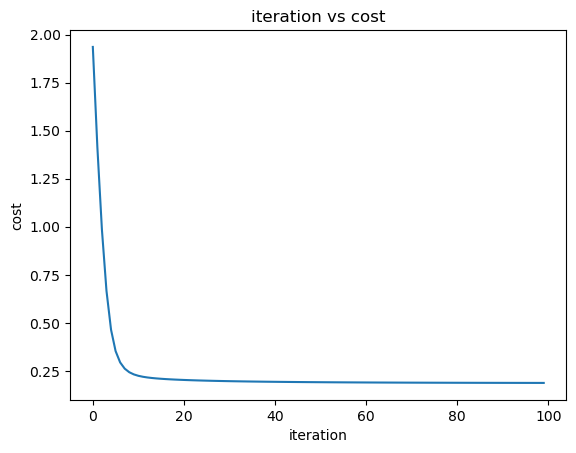

In [28]:
import matplotlib.pyplot as plt
import numpy as np

# plt.plot(np.arange(0,20000),c_hist)
plt.plot(np.arange(0,100),c_record[:100])
plt.title("iteration vs cost")
plt.xlabel("iteration")
plt.ylabel("cost")
plt.show()

In [29]:
z = (w_final * x_test).sum(axis=1) + b
y_pred = sigmoid(z)
y_pred

array([6.58568640e-01, 7.71853697e-04, 2.79875044e-03, 4.47956102e-06,
       9.97377090e-01, 1.23771340e-01, 9.95664661e-01, 9.99990372e-01,
       2.98632593e-01, 9.50302519e-02, 1.12614274e-02, 9.99781379e-01,
       1.42645207e-02, 9.94754096e-01, 7.30841403e-01, 1.32404580e-05,
       1.07233493e-04, 9.99472624e-01, 9.99954840e-01, 9.96380743e-01,
       6.64077317e-01, 4.99788163e-02, 5.06884222e-02, 9.68489725e-01,
       2.78896599e-03, 8.40149783e-01, 9.99787868e-01, 9.98325439e-01,
       9.24694710e-01, 7.98512514e-02, 4.73730812e-06, 9.99997554e-01,
       9.95670190e-01, 9.99949057e-01, 4.92431371e-03, 9.04189843e-03,
       7.18926197e-02, 9.99967136e-01, 9.98461130e-01, 9.92944327e-01,
       1.13353679e-04, 7.49687714e-05, 9.98975476e-01, 9.95351770e-01,
       9.75037728e-01, 9.96044544e-01, 9.99745558e-01, 2.59098334e-01,
       9.95680166e-01, 3.32259819e-02, 9.98422809e-01, 3.91755946e-01,
       9.94469776e-01, 6.41516274e-02, 9.85849895e-01, 7.88053827e-01,
      

In [30]:
y_pred = np.where(y_pred>0.5,1,0)
y_pred

array([1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0])

In [31]:
(y_pred == y_test).sum() / len(y_test)

np.float64(0.9833333333333333)

In [33]:
acc = (y_pred == y_test).sum() / len(y_test) * 100
print(f"Accuracy: {acc:.2f} %")

Accuracy: 98.33 %


## Check data here

In [52]:
age = 65
loan = 300000 / 1000 #unit(k)
monthlypaid = 3500 / 1000 #unit(k)
gender = 0  #female

x_realData = np.array([[age,loan,monthlypaid,gender]])
x_realData = scaler.transform(x_realData)
y_realData = (x_realData * w_final).sum(axis = 1) + b_final
y_realData = sigmoid(y_realData)

if y_realData > 0.5:
    print("Congratulations, you may get the loan")
else:
    print("Sorry, your loan are rejected")

Sorry, your loan are rejected
